# What drives the price of a car?

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

---

Business Goal: What features of a used car make it more or less expensive? Understand what consumers value in a used car.

Data Task: Generate a model to predict the price of a car, given used car feature data (such as the year, model, manfacturer, odometer, etc.) and its sell price. To determine which features influence the price the most, look at the largest model weights.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

---

#### Overall Step Summary
From the steps below, we'll get an understanding of what columns exist in our data, how many rows of data we have, what values exist in each column, and other info that'll help us clean up the data and format it as input into a ML model.

1. Use df.info()
2. Use df.sample() 
3. Use df.describe() on numeric columns and non-numeric columns
4. Determine what percentage of values are missing from columns
   - For columns missing a lot of values, they are eligible to be dropped or filled in with the mode
6. Make graphs to get a better understanding of the data distribution - ex: correlation heat map, box plot, pie chart
   - From the graphs, some potential things we can see are if there are any outliers, or any two variables that seem to have a strong positive or negative correlation with price

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('data/vehicles.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [11]:
# Convert to more specific datatypes (ex: from object to string)
df = df.convert_dtypes()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            426880 non-null  Int64 
 1   region        426880 non-null  string
 2   price         426880 non-null  Int64 
 3   year          425675 non-null  Int64 
 4   manufacturer  409234 non-null  string
 5   model         421603 non-null  string
 6   condition     252776 non-null  string
 7   cylinders     249202 non-null  string
 8   fuel          423867 non-null  string
 9   odometer      422480 non-null  Int64 
 10  title_status  418638 non-null  string
 11  transmission  424324 non-null  string
 12  VIN           265838 non-null  string
 13  drive         296313 non-null  string
 14  size          120519 non-null  string
 15  type          334022 non-null  string
 16  paint_color   296677 non-null  string
 17  state         426880 non-null  string
dtypes: Int64(4), string(14)


In [13]:
# Examine what 5 samples look like to get a sense of the data input
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
199273,7312360398,flint,16900,2014,ford,expedition,good,8 cylinders,gas,137000,clean,automatic,<NA>,4wd,<NA>,<NA>,black,mi
400379,7314661755,bellingham,40000,2015,toyota,tundra,<NA>,<NA>,gas,99444,clean,automatic,5TFDY5F15FX464974,4wd,<NA>,pickup,silver,wa
108433,7315056860,sarasota-bradenton,6899,2010,chrysler,town and county,excellent,6 cylinders,gas,146000,clean,automatic,<NA>,fwd,full-size,van,silver,fl
370283,7315532237,dallas / fort worth,0,2010,chevrolet,colorado,<NA>,5 cylinders,gas,126050,clean,automatic,1GCJTCDE7A8147356,4wd,<NA>,truck,silver,tx
206122,7309641911,lansing,7750,2011,buick,lacrosse,good,6 cylinders,gas,100500,clean,automatic,<NA>,fwd,full-size,sedan,black,mi


In [14]:
# Descriptive statistics for number type columns
df.describe().drop(columns='id').style.format("{:,.2f}")

,price,year,odometer
count,"426,880.00","425,675.00","422,480.00"
mean,"75,199.03","2,011.24","98,043.33"
std,"12,182,282.17",9.45,"213,881.50"
min,0.00,"1,900.00",0.00
25%,"5,900.00","2,008.00","37,704.00"
50%,"13,950.00","2,013.00","85,548.00"
75%,"26,485.75","2,017.00","133,542.50"
max,"3,736,928,711.00","2,022.00","10,000,000.00"


In [15]:
# Descriptive statistics for non-number type columns
df.describe(exclude=np.number).sort_values(by='count', axis=1, ascending=False)

,region,state,transmission,fuel,model,title_status,manufacturer,type,paint_color,drive,VIN,condition,cylinders,size
count,426880,426880,424324,423867,421603,418638,409234,334022,296677,296313,265838,252776,249202,120519
unique,404,51,3,5,29649,6,42,13,12,3,118246,6,8,4
top,columbus,ca,automatic,gas,f-150,clean,ford,sedan,white,4wd,1FMJU1JT1HEA52352,good,6 cylinders,full-size
freq,3608,50614,336524,356209,8009,405117,70985,87056,79285,131904,261,121456,94169,63465


In [16]:
# Get percentage of column values that are non-null
nonnull_percentage_df = (df.count() / len(df)).to_frame().sort_values(by=0, ascending=False).rename(columns={0: 'percent_nonnull'})

In [17]:
nonnull_percentage_df

,percent_nonnull
id,1.000000
region,1.000000
state,1.000000
price,1.000000
year,0.997177
transmission,0.994012
fuel,0.992942
odometer,0.989693
model,0.987638
title_status,0.980692


In [18]:
# Get columns that have < 95% non-null values - eligible to either drop the columns or fill them with the mode
columns_lt_95_percent = nonnull_percentage_df.query('percent_nonnull < 0.95')
columns_lt_95_percent

,percent_nonnull
type,0.782473
paint_color,0.694989
drive,0.694137
VIN,0.622746
condition,0.592148
cylinders,0.583775
size,0.282325


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

---


* From the data analysis above, let's decide which columns to completely drop
   * id - Unique identifier that differs for each car and has no bearing on the price, so we can drop it
   * VIN - Another unique identifier for each car. Technically, you could pull the model and other details like manufacturing info from the VIN, but to keep things simple (by not needing to parse the VIN to extract info) we'll just drop it.
   * size - Too many values are missing (only 28% nonnull values) so let's drop it
   * model - There's 29,649 unique string values. It would increase the dimensionality of the dataset too much to one hot encode it. So, let's drop it.
   * region - There's 404 unique string values. It would also increase the dimensionality of the dataset too much.
   * state - There's 51 unique string values. From general knowledge, where the car was bought shouldn't affect the price as much as other features like fuel, so it doesn't seem worth it to increase the dimesionality of the dataset with one hot encoding here.
* For the columns with < 95% nonnull values (which also have > 58% nonnull values), let's fill them with the mode of the column
   * type: sedan
   * paint_color: white
   * drive: 4wd
   * condition: good
   * cylinders: 6 cylinders
* For columns with > 95% nonnull values, let's drop the rows with null in those columns. Let's not guess values for those columns, and just have very accurate data for those particular columns. Since they're mostly filled with nonnull values, dropping the null rows won't greatly decrease the total amount of data we have
  * year
  * transmission
  * fuel
  * odometer
  * model
  * title_status
  * manufacturer
* Remaining columns to One Hot Encode. The numbers refer to the unique values per column
   * manufacturer: 41 
   * cylinders: 8 
   * fuel: 5
   * title_status: 6
   * transmission: 3
   * drive: 3
   * type: 12
   * paint_color: 12
* Remaining columns to Ordinal Encode - because condition has an inherent ordering
   * condition
* Columns to check outliers for
   * price
   * odometer

#### Dropping Columns

In [24]:
cleaned_df = df.drop(columns=['id', 'VIN', 'size', 'model', 'region', 'state'])

#### Filling < 95% non-null columns with the Mode

In [26]:
columns_to_fill_with_mode = ['type', 'paint_color', 'drive', 'condition', 'cylinders']

In [27]:
for col in columns_to_fill_with_mode: 
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].mode()[0])

#### For >95% non-null columns, dropping rows with null in those columns

In [29]:
cleaned_df = cleaned_df.dropna(subset=['year', 'transmission', 'fuel', 'odometer', 'title_status', 'manufacturer'])

#### How Much Data Was Retained After Steps Above?

In [31]:
print('Cleaned DataFrame Shape:', cleaned_df.shape)

Cleaned DataFrame Shape: (394751, 12)


In [32]:
print('Original DataFrame Shape:', df.shape)

Original DataFrame Shape: (426880, 18)


In [33]:
print(f"Retained {len(cleaned_df) / len(df) * 100:.2f}% of data")

Retained 92.47% of data


#### Price: Inaccurate Info and Outliers Analysis

Let's look at the Lower Bound of Price Values

In [36]:
cleaned_df['price'].value_counts().sort_index()

price
0             29137
1              1687
2                12
3                 9
4                 4
              ...  
1234567890        1
1410065407        1
3009548743        1
3024942282        2
3736928711        2
Name: count, Length: 14736, dtype: Int64

It doesn't make sense to have cars sold at 0 dollars or, more generally, for a small amount of money. We'll make an arbitrary cut-off point where a car should be sold for at least $50.

In [38]:
lower_bound_price_filter = 50
remove_lower_price_df = cleaned_df[cleaned_df['price'] > lower_bound_price_filter]

In [39]:
print(f"We have removed {len(cleaned_df) - len(remove_lower_price_df):,} rows that had car prices < ${lower_bound_price_filter:,}")

We have removed 31,083 rows that had car prices < $50


##### Let's look at the Upper Bound of Price Values

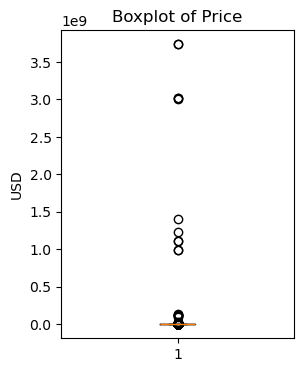

In [41]:
plt.figure(figsize=(3, 4))
plt.boxplot(remove_lower_price_df['price'])
plt.title('Boxplot of Price')
plt.ylabel('USD')
plt.show()

Note that you can barely see the box in the box plot because of the extreme outliers. Thus, played around with different boxplot values until I could see the box part of the boxplot and also capture some of the higher priced vehicles (even though some of them are still outliers - they're just not as extreme of an outlier). I settled on vehicles that were sold for <= $200,000.

In [43]:
upper_bound_price_filter = 200000
remove_upper_price_df = remove_lower_price_df[remove_lower_price_df['price'] <= upper_bound_price_filter]

In [44]:
print(f"We have removed {len(remove_lower_price_df) - len(remove_upper_price_df):,} rows that had car prices > ${upper_bound_price_filter:,}")

We have removed 86 rows that had car prices > $200,000


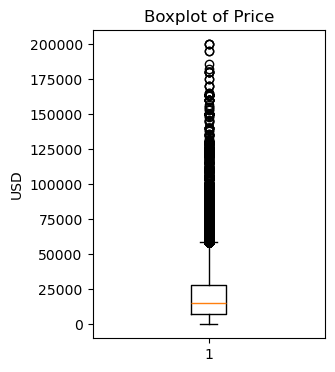

In [45]:
plt.figure(figsize=(3, 4))
plt.boxplot(remove_upper_price_df['price'])
plt.title('Boxplot of Price')
plt.ylabel('USD')
plt.show()

#### Odometer: Inaccurate Info and Outliers Analysis

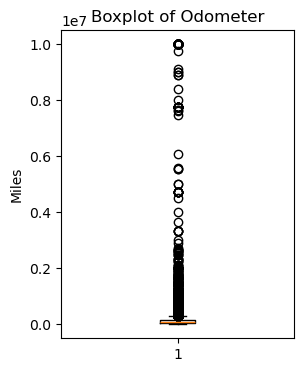

In [47]:
plt.figure(figsize=(3, 4))
plt.boxplot(remove_upper_price_df['odometer'])
plt.title('Boxplot of Odometer')
plt.ylabel('Miles')
plt.show()

Note that just like the initial boxplot for plot, you can barely see the box in the box plot because of the extreme outliers. Thus, played around with different boxplot values until I could see the box part of the boxplot. I ended up choosing values <= 400,000 miles.

In [49]:
upper_bound_odometer_filter = 400000
remove_upper_odometer_df = remove_upper_price_df[remove_upper_price_df['odometer'] <= upper_bound_odometer_filter]

In [50]:
print(f"We have removed {len(remove_upper_price_df) - len(remove_upper_odometer_df):,} rows that had an odometer value > {upper_bound_odometer_filter:,}")

We have removed 879 rows that had an odometer value > 400,000


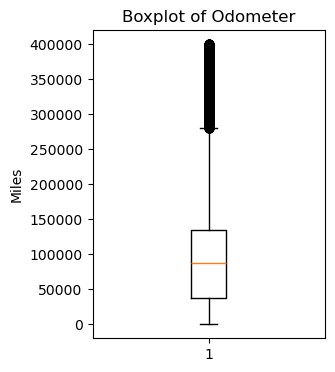

In [51]:
plt.figure(figsize=(3, 4))
plt.boxplot(remove_upper_odometer_df['odometer'])
plt.title('Boxplot of Odometer')
plt.ylabel('Miles')
plt.show()

#### One Hot Encode and Ordinal Encode Overview

We have the following from the beginning of the [Data Preparation Section](#Data-Preparation):
* Remaining columns to One Hot Encode
   * manufacturer: 41
   * cylinders: 8
   * fuel: 5
   * title_status: 6
   * transmission: 3
   * drive: 3
   * type: 12
   * paint_color: 12
* Remaining columns to Ordinal Encode
   * condition

In [54]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

#### Set Up Columns To One Hot Encode

In [56]:
# Rename DF before encoding
not_encoded_df = remove_upper_odometer_df

In [57]:
columns_to_one_hot_encode = not_encoded_df.select_dtypes(include='string').columns.tolist()

In [58]:
# Remove "condition" since we're going to use the Ordinal Encoder for that one
columns_to_one_hot_encode.remove('condition')
columns_to_one_hot_encode

['manufacturer',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color']

#### Set Up Ordinal Encoder

In [60]:
not_encoded_df['condition'].value_counts()

condition
good         252555
excellent     83630
like new      19023
fair           6000
new             973
salvage         522
Name: count, dtype: Int64

In [61]:
ordinal_encoder = OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']])

#### How to Transform Dataframe Columns Using the One Hot Encoder and Ordinal Encoder

In [63]:
column_transformer = make_column_transformer(
    (OneHotEncoder(), columns_to_one_hot_encode),
    (ordinal_encoder, ['condition']),
    remainder='passthrough',
    force_int_remainder_cols=False
)

### Graphs

#### Graph 1: Scatterplot

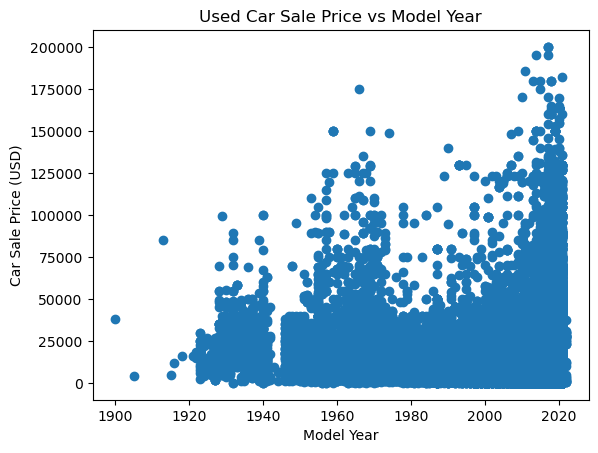

In [66]:
plt.title('Used Car Sale Price vs Model Year')
plt.ylabel('Car Sale Price (USD)')
plt.xlabel('Model Year')
plt.scatter(not_encoded_df['year'], not_encoded_df['price'])
plt.show()

As the year increases (it's a newer car), the price tends to increase. We can see that especially for the newest car model years (2019-2020), the total price range increases a lot more.

#### Graph 2: Scatterplot

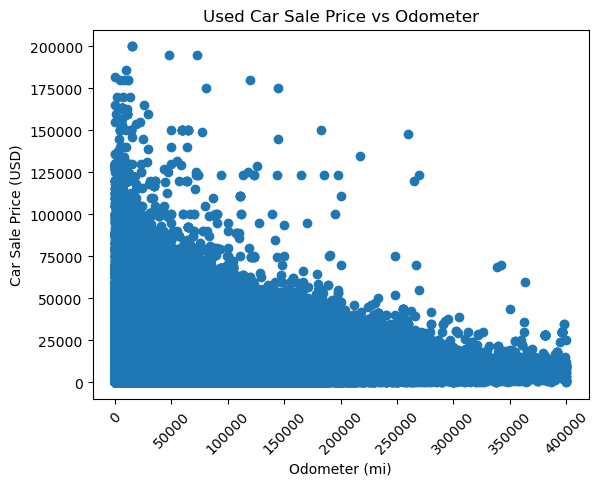

In [69]:
plt.title('Used Car Sale Price vs Odometer')
plt.ylabel('Car Sale Price (USD)')
plt.xlabel('Odometer (mi)')
plt.xticks(rotation=45)
plt.scatter(not_encoded_df['odometer'], not_encoded_df['price'])
plt.show()

As the odometer value increases (the car has been used more and has traveled more miles), the price tends to decrease.

#### Graph 3: Correlation Heat Map

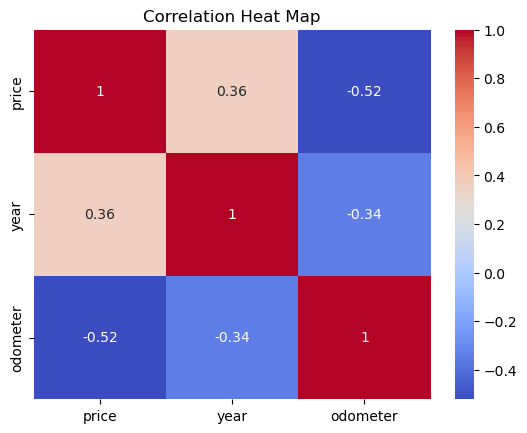

In [72]:
df_numeric = not_encoded_df.select_dtypes(include=np.number)
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()

From the Correlation Heat Map, we can see the same ideas as in the two graphs above
* As the year increases (it's a newer car), the price tends to increase
* As the odometer value increases (the car has been used more and has traveled more miles), the price tends to decrease

#### Graphs 4-12: Pie Charts

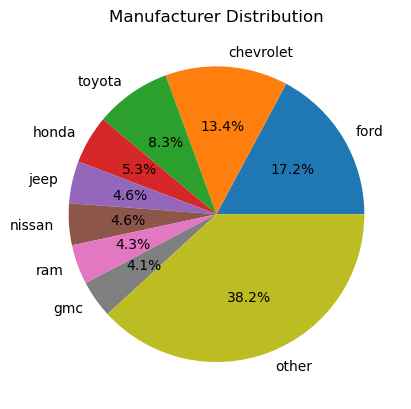

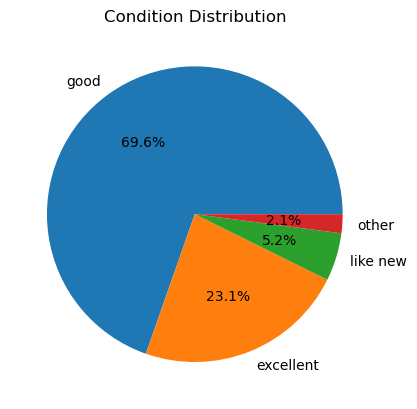

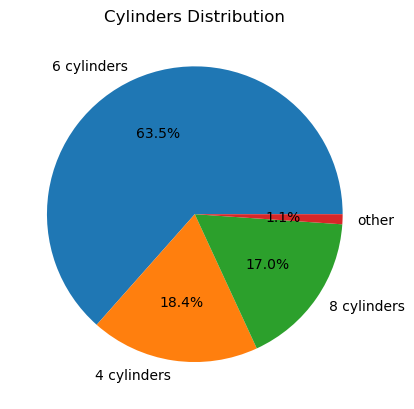

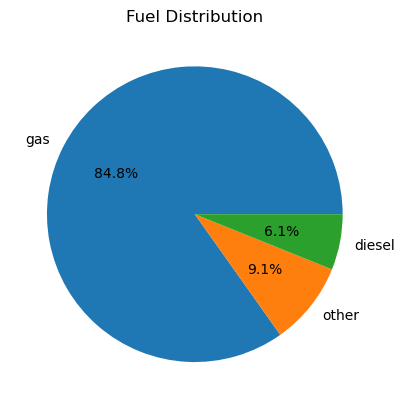

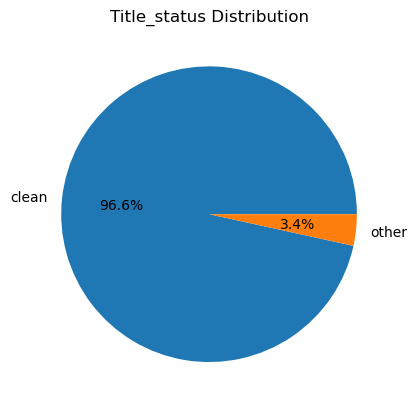

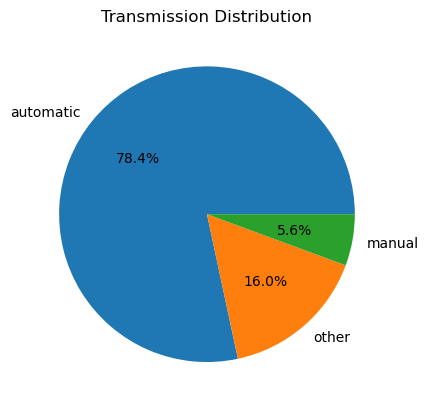

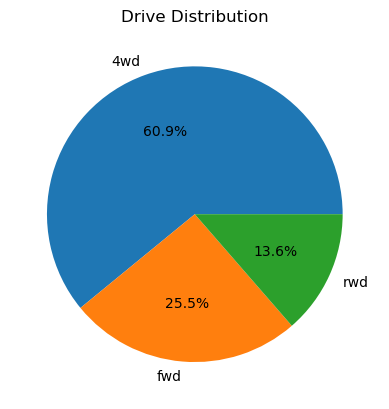

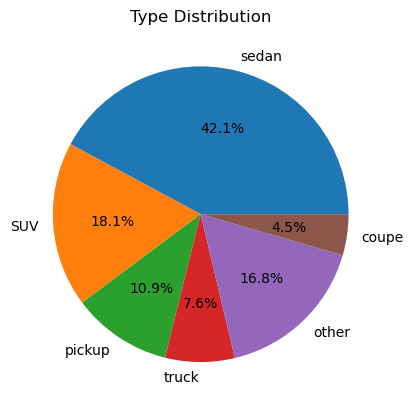

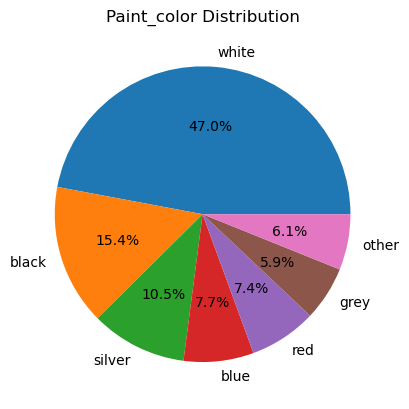

In [75]:
# Print pie charts for each of the categorical string columns
# Combine small slices of the pie (< 4%) into an "Other" category so the pie chart displays well
for column in not_encoded_df.columns:
    if not_encoded_df[column].dtype == 'string':
        # Get the percentage of each value in a column
        value_percentages = not_encoded_df[column].value_counts(normalize=True) * 100

        labels = []
        percentages = []
        other_percentage = 0
        
        # Combine labels with a percentage < 4% into an "other" category
        for label, percentage in value_percentages.items():
            if percentage >= 4:
                labels.append(label)
                percentages.append(percentage)
            else:
                other_percentage += percentage

        # Check if "other" category is needed
        if other_percentage > 0:
            # If there already exists an "other" category, add the values to it
            if 'other' in labels:
                index_of_other = labels.index('other')
                percentages[index_of_other] += other_percentage
            # Otherwise, create the new "other" category
            else: 
                labels.append('other')
                percentages.append(other_percentage)

        plt.title(f'{column.capitalize()} Distribution')
        plt.pie(percentages, labels=labels, autopct='%1.1f%%', labeldistance=1.1)
        plt.show()

Some things to note from the pie charts

* In general, the column "title_status" may not be a very useful predictor because 96.6% of the values are the same - "clean"
* For cars that have a column attribute that has little overall data representation (for ex: <5% of the data in the column), we may have trouble predicting an accurate price

#### Graph 13-14: Box Plots

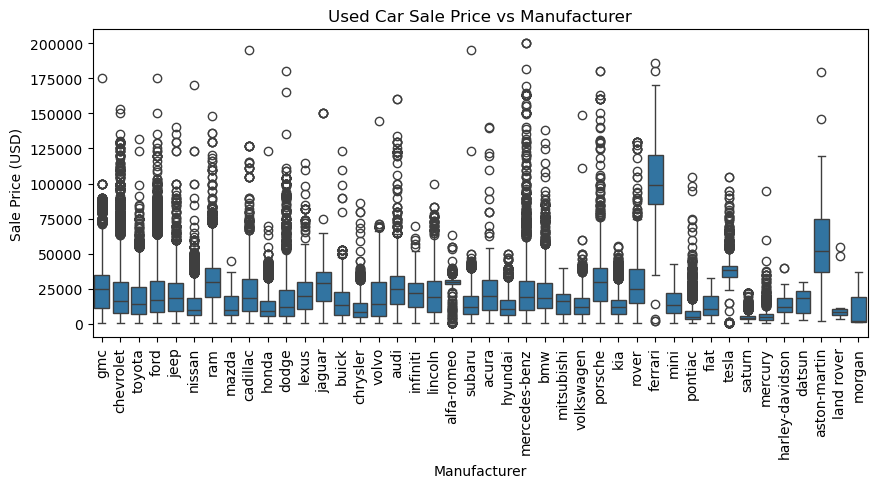

In [79]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=not_encoded_df['manufacturer'],y=not_encoded_df['price'])
plt.xticks(rotation=90)
plt.title('Used Car Sale Price vs Manufacturer')
plt.ylabel('Sale Price (USD)')
plt.xlabel('Manufacturer')
plt.show()

You can see the manufacturer has some effect on the price. For example, you can see that ferrari's and aston-martin's tend to be priced much higher than other manufacturers.

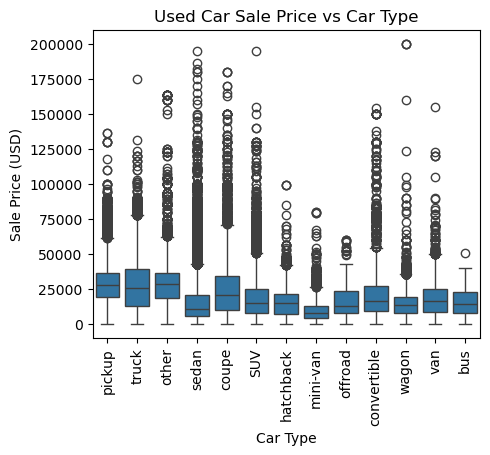

In [81]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=not_encoded_df['type'],y=not_encoded_df['price'])
plt.xticks(rotation=90)
plt.title('Used Car Sale Price vs Car Type')
plt.ylabel('Sale Price (USD)')
plt.xlabel('Car Type')
plt.show()

You can see the car type also has some effect on the price. For example, mini-vans and sedans are typically on the lower-end of the price spectrum, but pickups and trucks are on the higher end.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

---

In [85]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [86]:
def print_model_evaluation_metrics(y_true, y_pred, data_type):
    print(f"{data_type} Data Evaluation Metrics")
    r2 = r2_score(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    print(f"R2 Score: {r2:.6f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:,.4f}")
    print(f"Mean Squared Error (MSE): {mse:,.4f}")

In [87]:
X = not_encoded_df.drop(columns='price')
y = not_encoded_df['price']

#### Model 1
One hot encode + Ordinal Encode + Linear Regression

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
columns_to_one_hot_encode = X_train.select_dtypes(include='string').columns.tolist()
columns_to_one_hot_encode.remove('condition')

In [91]:
ordinal_encoder = OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']])
column_transformer = make_column_transformer(
    (OneHotEncoder(), columns_to_one_hot_encode),
    (ordinal_encoder, ['condition']),
    remainder='passthrough',
    force_int_remainder_cols=False
)

In [92]:
pipe = Pipeline([
    ('col_transformer', column_transformer),
    ('linreg', LinearRegression())
])
pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

print_model_evaluation_metrics(y_train, train_preds, 'Training')
print()
print_model_evaluation_metrics(y_test, test_preds, 'Test')

Training Data Evaluation Metrics
R2 Score: 0.526358
Root Mean Squared Error (RMSE): 10,162.1356
Mean Squared Error (MSE): 103,269,000.4806

Test Data Evaluation Metrics
R2 Score: 0.531533
Root Mean Squared Error (RMSE): 10,041.0193
Mean Squared Error (MSE): 100,822,069.4993


#### Model 2
Like Model 1, but adding Standard Scaler

Standard Scaler + One hot encode + Ordinal Encode + Linear Regression

In [94]:
numeric_columns = X_train.select_dtypes(include=['number']).columns.tolist()
column_transformer = make_column_transformer(
    (StandardScaler(), numeric_columns), 
    (OneHotEncoder(), columns_to_one_hot_encode),
    (ordinal_encoder, ['condition']),
    remainder='passthrough',
    force_int_remainder_cols=False
)

In [95]:
pipe = Pipeline([
    ('col_transformer', column_transformer),
    ('linreg', LinearRegression())
])
pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

print_model_evaluation_metrics(y_train, train_preds, 'Training')
print()
print_model_evaluation_metrics(y_test, test_preds, 'Test')

Training Data Evaluation Metrics
R2 Score: 0.569331
Root Mean Squared Error (RMSE): 9,690.1759
Mean Squared Error (MSE): 93,899,508.1387

Test Data Evaluation Metrics
R2 Score: 0.574561
Root Mean Squared Error (RMSE): 9,568.7912
Mean Squared Error (MSE): 91,561,765.0249


Note: Performs better than Model 1 (which doesn't have the Standard Scaler)

#### Model 3
Model 2 but removing more outliers in the data and dropping columns with < 80% non-null data

In [98]:
not_encoded_df.shape

(362703, 12)

In [99]:
# Remove more outliers from price and odometer
df_modification1 = not_encoded_df.query('price > 1000 and price < 100000 and odometer < 300000', engine='python')

In [100]:
# Remove the columns that had < 80% non-null values and were previously filled with the mode
df_modification1 = df_modification1.drop(columns=['type', 'paint_color', 'drive', 'condition', 'cylinders'])

In [101]:
df_modification1.head()

,price,year,manufacturer,fuel,odometer,title_status,transmission
27,33590,2014,gmc,gas,57923,clean,other
28,22590,2010,chevrolet,gas,71229,clean,other
29,39590,2020,chevrolet,gas,19160,clean,other
30,30990,2017,toyota,gas,41124,clean,other
31,15000,2013,ford,gas,128000,clean,automatic


In [102]:
X = df_modification1.drop(columns='price')
y = df_modification1['price']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
numeric_columns = X_train.select_dtypes(include=['number']).columns.tolist()
columns_to_one_hot_encode = X_train.select_dtypes(include='string').columns.tolist()

In [105]:
column_transformer = make_column_transformer(
    (StandardScaler(), numeric_columns), 
    (OneHotEncoder(handle_unknown='ignore'), columns_to_one_hot_encode),
    remainder='passthrough',
    force_int_remainder_cols=False
)

In [106]:
pipe = Pipeline([
    ('col_transformer', column_transformer),
    ('linreg', LinearRegression())
])
pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

print_model_evaluation_metrics(y_train, train_preds, 'Training')
print()
print_model_evaluation_metrics(y_test, test_preds, 'Test')

Training Data Evaluation Metrics
R2 Score: 0.565292
Root Mean Squared Error (RMSE): 9,358.9559
Mean Squared Error (MSE): 87,590,056.1058

Test Data Evaluation Metrics
R2 Score: 0.560742
Root Mean Squared Error (RMSE): 9,347.1498
Mean Squared Error (MSE): 87,369,209.9743


For the Test Data, comparing it to Model 2, even though the RMSE and MSE decreased a little, the R2 Score decreased a little as well (and lower R2 Score is not as favorable).

#### Model 4
Let's try using GridSearchCV and RidgeRegression to see if we can tune the model even more

In [109]:
all_indices = list(range(0, len(df_modification1)))
np.random.seed(42)
np.random.shuffle(all_indices)
split_index = int(len(df_modification1) * 0.8) 
training_indices, dev_indices = np.split(all_indices, [split_index]) 

In [110]:
scaled_ridge_model = Pipeline([
    ('col_transformer', column_transformer),
	('ridge', Ridge(alpha=1),)
])
parameters_to_try = {'ridge__alpha': 10 ** np.linspace(-5,4, 100)}

In [111]:
model_finder = GridSearchCV(
	estimator=scaled_ridge_model,
	param_grid=parameters_to_try,
	scoring='neg_mean_squared_error',
	cv=[[training_indices, dev_indices]]
)

In [112]:
model_finder.fit(X, y)

GridSearchCV(cv=[[array([303848, 117097,  19603, ...,  78984, 194259, 155783]),
                  array([302493, 234489, 295525, ..., 131932, 146867, 121958])]],
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(han...
       8.11130831e+01, 1.00000000e+02, 1.23284674e+02, 1.51991108e+02,
       1.87381742e+02, 2.31012970e+02, 2.84803587e+02, 3.51119173e+02,
       4.32876128e+02, 5.33669923e+02, 6.57933225e+02, 8.11130831e+02,
       1.00000000e+03, 1.23284674e+03, 1.51991108e+03, 1.87381742e+03,
       2.31012970e+03, 2.84803587e+03, 3.51119173e+03, 4.32876128e+03,
       5.33669923e+03, 6.57933225e+03, 8.11130831e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [113]:
best_model = model_finder.best_estimator_

In [114]:
X_train = X.iloc[training_indices]
y_train = y.iloc[training_indices]

X_test = X.iloc[dev_indices]
y_test = y.iloc[dev_indices]

In [115]:
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

print_model_evaluation_metrics(y_train, train_preds, 'Training')
print()
print_model_evaluation_metrics(y_test, test_preds, 'Test')

Training Data Evaluation Metrics
R2 Score: 0.562953
Root Mean Squared Error (RMSE): 9,372.5323
Mean Squared Error (MSE): 87,844,362.1395

Test Data Evaluation Metrics
R2 Score: 0.570236
Root Mean Squared Error (RMSE): 9,291.6142
Mean Squared Error (MSE): 86,334,094.0447


Compared to model 2 (our best model so far), although the RMSE and MSE decreased a little, the R2 score is a little lower as well. So, this model 4 seems comparable to model 2.

#### Model 5
Let's try Polynomial Features but with just the year and odometer columns included.

In [118]:
df_modification2 = df_modification1[['price', 'year', 'odometer']]
df_modification2.head()

,price,year,odometer
27,33590,2014,57923
28,22590,2010,71229
29,39590,2020,19160
30,30990,2017,41124
31,15000,2013,128000


In [119]:
X = df_modification2.drop(columns='price')
y = df_modification2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scale', StandardScaler()),
    ('linreg', LinearRegression())
])
pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

print_model_evaluation_metrics(y_train, train_preds, 'Training')
print()
print_model_evaluation_metrics(y_test, test_preds, 'Test')

Training Data Evaluation Metrics
R2 Score: 0.432615
Root Mean Squared Error (RMSE): 10,692.2159
Mean Squared Error (MSE): 114,323,479.8566

Test Data Evaluation Metrics
R2 Score: 0.431525
Root Mean Squared Error (RMSE): 10,633.4739
Mean Squared Error (MSE): 113,070,767.2887


Note: With fewer features in the model, the test data evaluation score is not able to predict as accurately as other models containing more features

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

---

Looking at the various models and their R2 Score, RMSE, and MSE, **Model 2** seemed to perform the best.
As a recap, it used the data from `not_encoded_df` and the following code

In [125]:
X = not_encoded_df.drop(columns='price')
y = not_encoded_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ordinal_encoder = OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']])

numeric_columns = X_train.select_dtypes(include=['number']).columns.tolist()
columns_to_one_hot_encode = not_encoded_df.select_dtypes(include='string').columns.tolist()
columns_to_one_hot_encode.remove('condition')

column_transformer = make_column_transformer(
    (StandardScaler(), numeric_columns), 
    (OneHotEncoder(), columns_to_one_hot_encode),
    (ordinal_encoder, ['condition']),
    remainder='passthrough',
    force_int_remainder_cols=False
)

pipe = Pipeline([
    ('col_transformer', column_transformer),
    ('linreg', LinearRegression())
])

pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

print_model_evaluation_metrics(y_train, train_preds, 'Training')
print()
print_model_evaluation_metrics(y_test, test_preds, 'Test')

Training Data Evaluation Metrics
R2 Score: 0.569331
Root Mean Squared Error (RMSE): 9,690.1759
Mean Squared Error (MSE): 93,899,508.1387

Test Data Evaluation Metrics
R2 Score: 0.574561
Root Mean Squared Error (RMSE): 9,568.7912
Mean Squared Error (MSE): 91,561,765.0249


Since the scores are similar across training and test data, this shows that the model is likely not overfitting the data. In fact, it actually has a slightly better score on the test data.

The RMSE error of 9,568.7912 on the test data means that on average, the model is off by about $9,568.79 when predicting a used car sale price.

The R² score of 0.57 means that 57% of the variation in price can be explained by the model features. 

Now, let's look at the weights to see which features seemed to impact price the most.  Since we standardized our feature values, we can have a fair comparison of the weights against each other.

In [128]:
model = pipe.named_steps['linreg']
feature_names = column_transformer.get_feature_names_out()

In [129]:
weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': model.coef_}).sort_values(by='Weight', ascending=False)
weights_df

,Feature,Weight
13,onehotencoder__manufacturer_ferrari,68293.195227
4,onehotencoder__manufacturer_aston-martin,27726.603802
40,onehotencoder__manufacturer_tesla,14337.863681
52,onehotencoder__fuel_diesel,12405.836663
35,onehotencoder__manufacturer_porsche,10000.483927
...,...,...
23,onehotencoder__manufacturer_kia,-7086.158308
38,onehotencoder__manufacturer_saturn,-7305.362478
31,onehotencoder__manufacturer_mitsubishi,-8472.930496
14,onehotencoder__manufacturer_fiat,-10604.228045


Let's look at the 20 most positive weights (have a larger positive impact on price), and the 20 most negative weights (have a larger negative impact on price).

In [131]:
weights_df[:20]

,Feature,Weight
13,onehotencoder__manufacturer_ferrari,68293.195227
4,onehotencoder__manufacturer_aston-martin,27726.603802
40,onehotencoder__manufacturer_tesla,14337.863681
52,onehotencoder__fuel_diesel,12405.836663
35,onehotencoder__manufacturer_porsche,10000.483927
11,onehotencoder__manufacturer_datsun,6526.998033
44,onehotencoder__cylinders_10 cylinders,6230.891773
58,onehotencoder__title_status_lien,4317.293705
0,standardscaler__year,3349.721776
79,onehotencoder__type_truck,3317.051592


* The most significant positive impact on price is if the car manufacturer is ferrari
   * It makes sense because ferrari cars are very high end and priced as such
* Some of the other most significant positive impact contributors are
   * manufacturers - aston martin, tesla, porsche, datsun 
   * model types - pickup, truck, rover
   * diesel fuel
   * title status - lien, clean
   * year
   * 10 cylinders, 12 cylinders, 8 cylinders
   * 4wd

In [133]:
weights_df[-20:]

,Feature,Weight
39,onehotencoder__manufacturer_subaru,-4485.564108
7,onehotencoder__manufacturer_buick,-4660.338544
70,onehotencoder__type_bus,-4728.132039
12,onehotencoder__manufacturer_dodge,-4765.077617
60,onehotencoder__title_status_parts only,-4818.135507
46,onehotencoder__cylinders_3 cylinders,-5146.649540
30,onehotencoder__manufacturer_mini,-5471.984836
53,onehotencoder__fuel_electric,-5577.333041
33,onehotencoder__manufacturer_nissan,-5934.317976
27,onehotencoder__manufacturer_mazda,-6018.389911


* For a negative impact on price, the **most significant** factor is the **harley-davidson**
   * This **doesn't make that much sense** given the boxplot in an earlier section, where the harley-davidson IQR and median is not much lower compared to a lot of other manufacturers
   * This discrepancy might be due to the random sampling only picking out very low priced harley davidsons just by random chance
* For non-manufacturer features, the ones with more significant of a negative impact are
   * odometer
   * fuel - electric
   * 3 cylinders
   * title_status - parts only
   * type - bus

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

---

**Summary**

* On average, we'll be $9,568.79 off when predicting a used car sale price.
* About 57% of the variation in price can be explained by the model features, so it's not a very accurate model, but can still yield some insights.
* Things the consumer care about in a used car that drive the sale price **up** are:
    * manufacturers - aston martin, tesla, porsche, datsun
    * model types - pickup, truck, rover
    * diesel fuel
    * title status - lien, clean
    * year (later year = newer car)
    * 10 cylinders, 12 cylinders, 8 cylinders
    * 4wd
* Things the consumer care about in a used car that drive the sale price **down** are:
   * odometer (high value for odometer = car is driven more and is more worn out)
   * fuel - electric
   * 3 cylinders
   * title_status - parts only
   * type - bus

**Deployment Strategy** 

When trying to determine how much a used car will sell for, please collect the following information:
* year
* manufacturer
* condition
* cylinders
* fuel
* odometer
* title_status
* transmission
* drive
* type
* paint_color

Once you've collected that information, format that data into a dataframe, and input the data frame into Model2 above by using `pipe.predict()` with the information you've collected. The output will be the price.